# Decision Tree and Random Forrest on Titanic dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic_train = pd.read_csv("train.csv")

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [5]:
titanic_train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [6]:
# Using LabelEncoder on the feature 'Sex'.
le = LabelEncoder()

titanic_train['Sex'] = le.fit_transform(titanic_train['Sex'])

titanic_train['Sex'].unique()

array([1, 0])

In [7]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# IDV features

predictor = pd.DataFrame([titanic_train['Pclass'], titanic_train['Sex'], titanic_train['Age'], titanic_train['Fare']]).T

In [9]:
# Using DecisionTreeClassifier algorithm

tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [10]:
tree_model.fit(X=predictor, y=titanic_train['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
with open('Dt1.dot', 'w') as f:
    f = tree.export_graphviz(tree_model, feature_names=['Pclass', 'Sex', 'Age', 'Fare'], out_file=f);

In [12]:
# Calculate the model accuracy

tree_model.score(X=predictor, y=titanic_train['Survived'])

0.8976377952755905

The model created using test dataset has an accuracy of 89.65%

__Using RandomForrestClassfier to find the optimum features for a better model__

In [13]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int32  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.0+ KB


In [15]:
# Using LabelEncoder on the feature 'Embarked'.

titanic_train['Embarked'] = le.fit_transform(titanic_train['Embarked'])
titanic_train['Embarked'].unique()

array([2, 0, 1])

In [16]:
# IDV feature selection.

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [17]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [18]:
rf_model.fit(X=titanic_train[features], y=titanic_train['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
print('The oob accuracy score is :', rf_model.oob_score_)

The oob accuracy score is : 0.8166479190101237


In [20]:
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature, imp);

Pclass 0.08866920435668632
Sex 0.26715253100490355
Age 0.2716325271131237
SibSp 0.05200640930656152
Fare 0.2862734599064432
Embarked 0.0342658683122818


The features of most significance are : Sex, Age & Fare

__Creating a Decision Tree classification model of train dataset using the above important features__

In [21]:
# Selecting the important IDV features.
predictor = pd.DataFrame([titanic_train['Sex'], titanic_train['Age'], titanic_train['Fare']]).T

In [22]:
tree_model = tree.DecisionTreeClassifier()

In [23]:
tree_model.fit(X=predictor, y=titanic_train['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
with open('Dt2.dot', 'w') as f:
    f=tree.export_graphviz(tree_model, feature_names=['Sex', 'Age', 'Fare'], out_file=f);

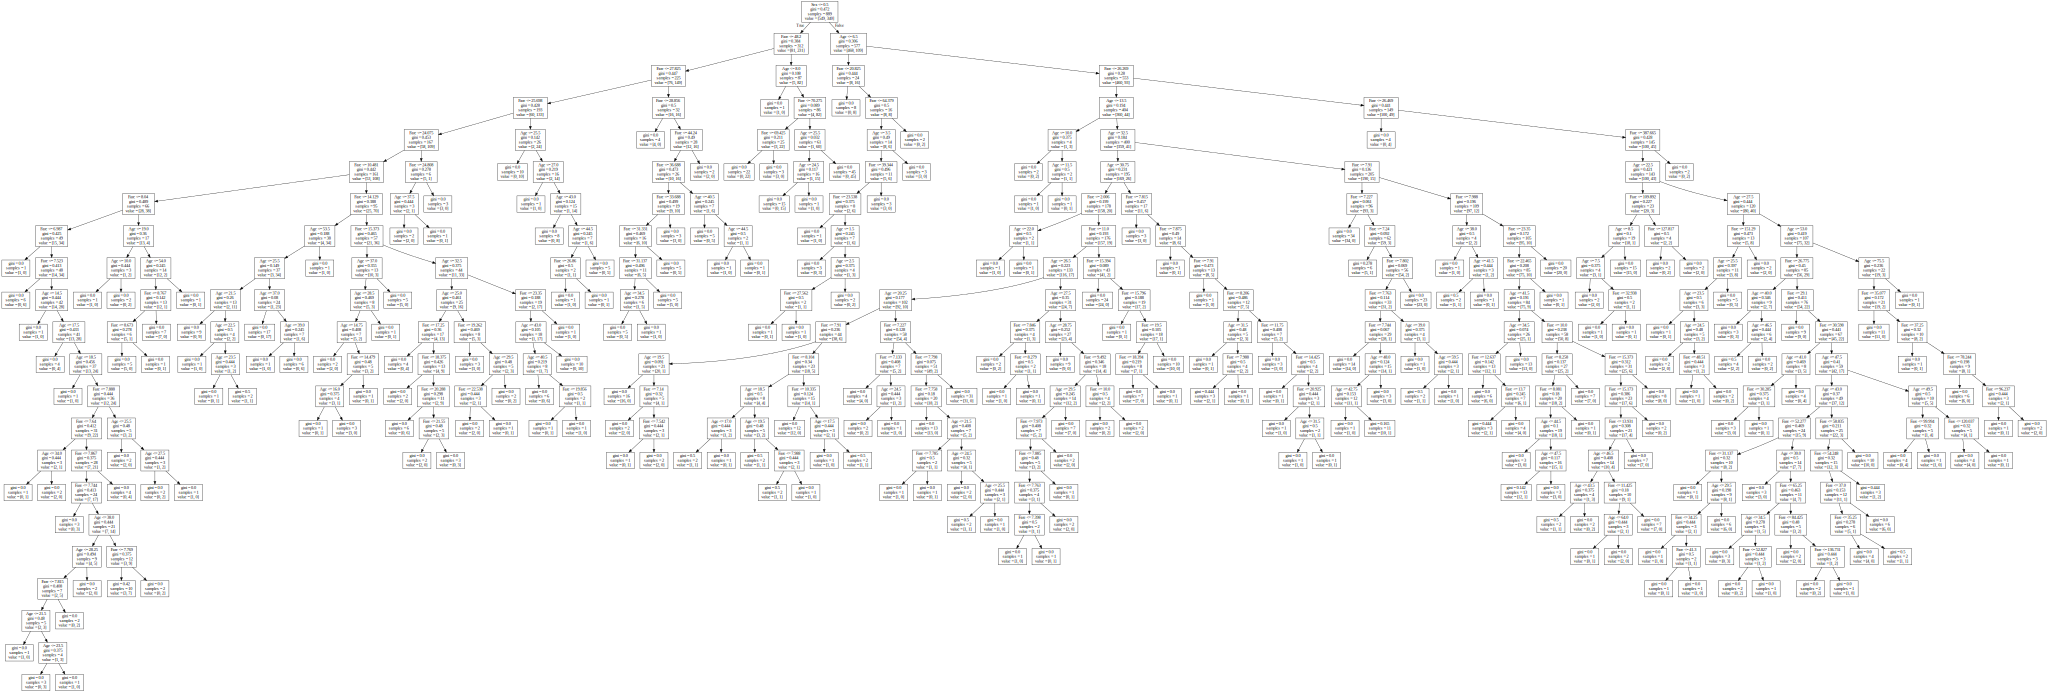

In [37]:
import graphviz

with open('Dt2.dot') as f:
    tr_graph = f.read()

graphviz.Source(tr_graph)

In [25]:
tree_model.score(X=predictor, y=titanic_train['Survived'])

0.9763779527559056

With the important features only selected it is observed that the model accuracy has increased to 97.63%.

__Using Decision Tree for prediction__

In [26]:
titanic_test = pd.read_csv('test.csv')

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [27]:
titanic_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
titanic_test['Embarked'].value_counts()

S    269
C    102
Q     46
Name: Embarked, dtype: int64

In [29]:
# Using labelEncoder on the feature 'Embarked'

titanic_test['Embarked'] = le.fit_transform(titanic_test['Embarked'])

titanic_test['Embarked'].unique()

array([1, 2, 0])

In [30]:
titanic_test['Sex'].value_counts()

male      265
female    152
Name: Sex, dtype: int64

In [31]:
# Using LabelEncoder on the feature 'Sex'

titanic_test['Sex'] = le.fit_transform(titanic_test['Sex'])

titanic_test['Sex'].unique()

array([1, 0])

In [32]:
# Selecting the IDV feature variables.

test_features = pd.DataFrame([titanic_test['Sex'], titanic_test['Age'], titanic_test['Fare']]).T

In [33]:
# Predicting test outcome based on training data.

test_pred = tree_model.predict(X=test_features)

In [34]:
Predicted_Output = pd.DataFrame({'PassengerId' : titanic_test['PassengerId'], 'Name' : titanic_test['Name'], 'Sex' : titanic_test['Sex'], 'Age' : titanic_test['Age'].round(), 'Survived' : test_pred})

In [35]:
Predicted_Output.to_csv('Output_titanic.csv', index=False)

Predicted Output to an output file 'Output_titanic.csv'

In [36]:
Output = pd.read_csv('Output_titanic.csv')

Output.head()

,PassengerId,Name,Sex,Age,Survived
0,892,"Kelly, Mr. James",1,34.0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1
2,894,"Myles, Mr. Thomas Francis",1,62.0,0
3,895,"Wirz, Mr. Albert",1,27.0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,0
